<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/hpdp/DEADPOOL%20/case_study1/casestudy1deadpoolgc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blood Donations in Malaysia(EDA assignment by DEADPOOL)

The purpose of this assignment is to learn and discover more about Exploratory Data Analysis (EDA) on blood donation in different states in Malaysia  . We will be using a ```donation_state.csv ```for this assignment. This dataset contains date, state, daily donation, type of bloods, location of donation, disease types, type of donors, and the frequncy of donors.

**Group Members:**


| NAME                                    | MATRIC NO. |
| :---------------------------------------- | :-------------: |
|**MUHAMMAD AMIR JAMIL BIN JAMLUS**|**(A21EC0202)**|
|**KEE SHIN PEARL**|**(A21EC0190)**|
|**MUHAMMAD IZZUDDIN BIN SHABRIN**|**(A21EC0083)**|
|**UMAR HAZIQ BIN MUHAMAD NORHISHAM**|**(A21EC0235)**|

## 1.Data Collection

The dataset was prepared and provided by Ministry of Health Malaysia.

The dataset can be downloaded from [MOH Github account](https://github.com/MoH-Malaysia/data-darah-public).

The raw dataset is also uploaded to [Github](https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/donations_state.csv). In this project, we will link the dataset from Github.

__Dataset Attributes with Description:__ <br>

The dataset has 91,252 rows and 19 columns

|Attribute|Description|
|:--------|:----------|
|`Date`|Date of donation record by State|
|`State`|State of donation record|
|`Daily`|Daily total donation quantity by State|
|`Blood a`|Total donation by type of blood A|
|`Blood b`|Total donation by type of blood B|
|`Blood o`|Total donation by type of blood O|
|`Blood ab`|Total donation by type of blood AB|
|`Location Centre`|Location centre of the donation|
|`Location Mobile`|Location of mobile booth donation|
|`Type Wholeblood`|Whole blood consists of red blood cells, white blood cells, and platelets suspended in a protective yellow liquid known as plasma.|
|`Type of Apheresis Platelet`|Quantity of donations with Apheresis platelet donation process|
|`Type of Apheresis Plasma`|Quantity of donations with Apheresis plasma donation process|
|`Type Other`|Quantity of donations with other types of donation process|
|`Social Civilian`|Number of civilian donating|
|`Social Student`|Number of students donating|
|`Social Police/Army`|Number of police/army personnel donating|
|`donations new`|First time donor(first experience)|
|`donations regular`|Regular donor(donates blood regularly)|
|`donations irregular`|Irregular donor(donates blood irregularly)|

## 2.Data Cleaning and Data Preparation

Next we can proceed to data cleaning which involves handling missing values, removing duplicates, and addressing any outliers/anomalies in the data. This ensures accuracy, reliability and consistency of future analysis.

Importing pandas and numpy

In [1]:
import pandas as pd
import numpy as np

Importing the relevant dataset from Github, inserting data into pandas dataframe and previewing the first 5 rows

In [2]:
donation = 'https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/donations_state.csv'
donation = pd.read_csv(donation)
donation.head()

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Malaysia,525,152,139,194,40,308,217,525,0,0,0,496,18,11,243,277,5
1,2006-01-02,Malaysia,227,53,43,112,19,162,65,217,6,4,0,224,2,1,83,143,1
2,2006-01-03,Malaysia,112,29,21,56,6,112,0,89,10,13,0,105,2,5,8,101,3
3,2006-01-04,Malaysia,391,92,98,165,36,145,246,371,4,16,0,316,71,4,286,102,3
4,2006-01-05,Malaysia,582,149,198,193,42,371,211,548,17,17,0,555,19,8,328,250,4


Retrieving basic information of the created dataframe.

In [3]:
donation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91308 entries, 0 to 91307
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date                     91308 non-null  object
 1   state                    91308 non-null  object
 2   daily                    91308 non-null  int64 
 3   blood_a                  91308 non-null  int64 
 4   blood_b                  91308 non-null  int64 
 5   blood_o                  91308 non-null  int64 
 6   blood_ab                 91308 non-null  int64 
 7   location_centre          91308 non-null  int64 
 8   location_mobile          91308 non-null  int64 
 9   type_wholeblood          91308 non-null  int64 
 10  type_apheresis_platelet  91308 non-null  int64 
 11  type_apheresis_plasma    91308 non-null  int64 
 12  type_other               91308 non-null  int64 
 13  social_civilian          91308 non-null  int64 
 14  social_student           91308 non-nul

Based on the retrieved information, we can observe how Python reads the columns. We notice that the Non-Null Count of all 19 columns translates to no null values. We can also learn about the data type of the columns, here we have object and int64. We decided that the date column is inaccurately translated into an object Dtype, so we need to take action and change the Dtype.

After we changed the Dtype, we can check with .info() and here we notice we have the correct Dtype

In [4]:
donation['date'] = pd.to_datetime(donation['date'])
donation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91308 entries, 0 to 91307
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     91308 non-null  datetime64[ns]
 1   state                    91308 non-null  object        
 2   daily                    91308 non-null  int64         
 3   blood_a                  91308 non-null  int64         
 4   blood_b                  91308 non-null  int64         
 5   blood_o                  91308 non-null  int64         
 6   blood_ab                 91308 non-null  int64         
 7   location_centre          91308 non-null  int64         
 8   location_mobile          91308 non-null  int64         
 9   type_wholeblood          91308 non-null  int64         
 10  type_apheresis_platelet  91308 non-null  int64         
 11  type_apheresis_plasma    91308 non-null  int64         
 12  type_other               91308 n

To ensure we have no null record, we can use isnull() and .sum() to check the number of null records. Here, we notice that sum of null records of all columns are 0

In [5]:
donation.isnull().sum()

date                       0
state                      0
daily                      0
blood_a                    0
blood_b                    0
blood_o                    0
blood_ab                   0
location_centre            0
location_mobile            0
type_wholeblood            0
type_apheresis_platelet    0
type_apheresis_plasma      0
type_other                 0
social_civilian            0
social_student             0
social_policearmy          0
donations_new              0
donations_regular          0
donations_irregular        0
dtype: int64

Here we are checking for any duplicate records, and if any, inserting  the  records into a new df called duplicate. We can observe we have no duplicate records in df duplicate.

In [6]:
duplicate = donation[donation.duplicated()]
duplicate

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular


The next step is to check for any outliers. First, observing the current df of donation, we notice that Malaysia is included in the df, this results in inconsistent view as we should be analysing only the states and Malaysia provides a total count of all states. Hence we first need to create a new df excluding Malaysia to achieve a fair analysis. New df of donation_states will be created and we will compare to the original df of donation.

In [7]:
donation_states = donation[donation['state'] != 'Malaysia']
donation_states

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
6522,2006-01-01,Johor,87,19,20,45,3,87,0,87,0,0,0,86,1,0,36,49,2
6523,2006-01-02,Johor,15,4,3,6,2,15,0,15,0,0,0,15,0,0,4,11,0
6524,2006-01-03,Johor,8,2,2,4,0,8,0,8,0,0,0,8,0,0,2,5,1
6525,2006-01-04,Johor,33,7,11,12,3,33,0,33,0,0,0,32,0,1,25,8,0
6526,2006-01-05,Johor,20,3,8,8,1,20,0,20,0,0,0,17,3,0,16,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91303,2023-11-05,W.P. Kuala Lumpur,805,216,206,379,4,123,682,805,0,0,0,733,69,3,109,557,139
91304,2023-11-06,W.P. Kuala Lumpur,469,99,153,193,24,100,369,441,11,16,1,267,196,6,111,319,39
91305,2023-11-07,W.P. Kuala Lumpur,555,147,138,234,36,83,472,537,9,9,0,419,129,7,113,319,123
91306,2023-11-08,W.P. Kuala Lumpur,504,127,146,200,31,105,399,481,13,10,0,450,46,8,77,337,90


In [8]:
donation

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Malaysia,525,152,139,194,40,308,217,525,0,0,0,496,18,11,243,277,5
1,2006-01-02,Malaysia,227,53,43,112,19,162,65,217,6,4,0,224,2,1,83,143,1
2,2006-01-03,Malaysia,112,29,21,56,6,112,0,89,10,13,0,105,2,5,8,101,3
3,2006-01-04,Malaysia,391,92,98,165,36,145,246,371,4,16,0,316,71,4,286,102,3
4,2006-01-05,Malaysia,582,149,198,193,42,371,211,548,17,17,0,555,19,8,328,250,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91303,2023-11-05,W.P. Kuala Lumpur,805,216,206,379,4,123,682,805,0,0,0,733,69,3,109,557,139
91304,2023-11-06,W.P. Kuala Lumpur,469,99,153,193,24,100,369,441,11,16,1,267,196,6,111,319,39
91305,2023-11-07,W.P. Kuala Lumpur,555,147,138,234,36,83,472,537,9,9,0,419,129,7,113,319,123
91306,2023-11-08,W.P. Kuala Lumpur,504,127,146,200,31,105,399,481,13,10,0,450,46,8,77,337,90


Now that we have donation_states, we can proceed with handling outliers. We notice that the provided dataframe has a lot of datapoints plotted outside the whiskers which indicates that our data is not normally distributed. We decided to keep these data points and create a new df excluding th outliers for our analysis. We created a boxplot to observe the outliers and how they fall below and above the lower bound and upper bound respectively.

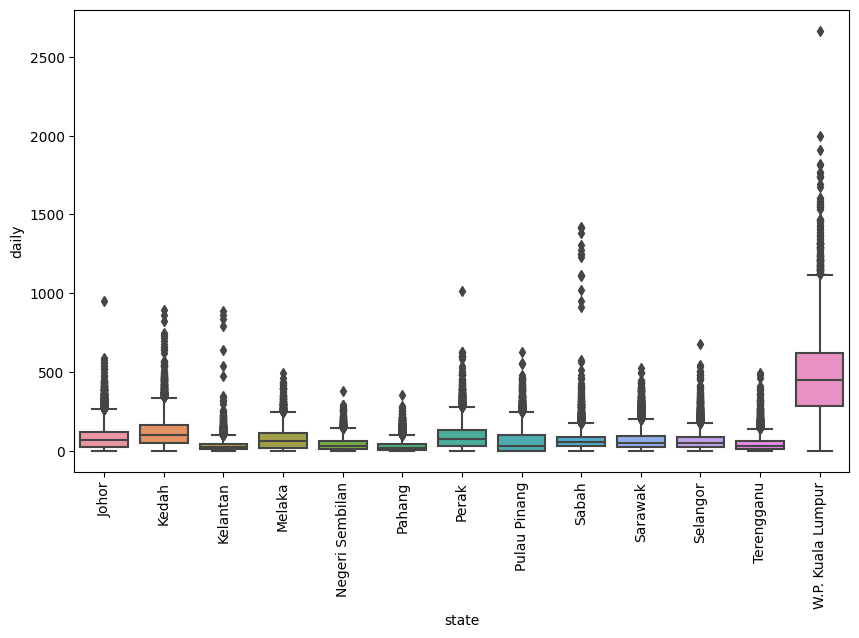

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x=donation_states['state'], y=donation_states['daily'])
plt.xticks(rotation=90)
plt.show()

Here we created a new df excluding the outliers.

In [10]:
def remove_outliers(group):
    Q1 = group['daily'].quantile(0.25)
    Q3 = group['daily'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['daily'] >= lower_bound) & (group['daily'] <= upper_bound)]

donation_no_outliers = donation_states.groupby('state').apply(remove_outliers).reset_index(drop=True)

We can observe now we have a more fair datapoints.

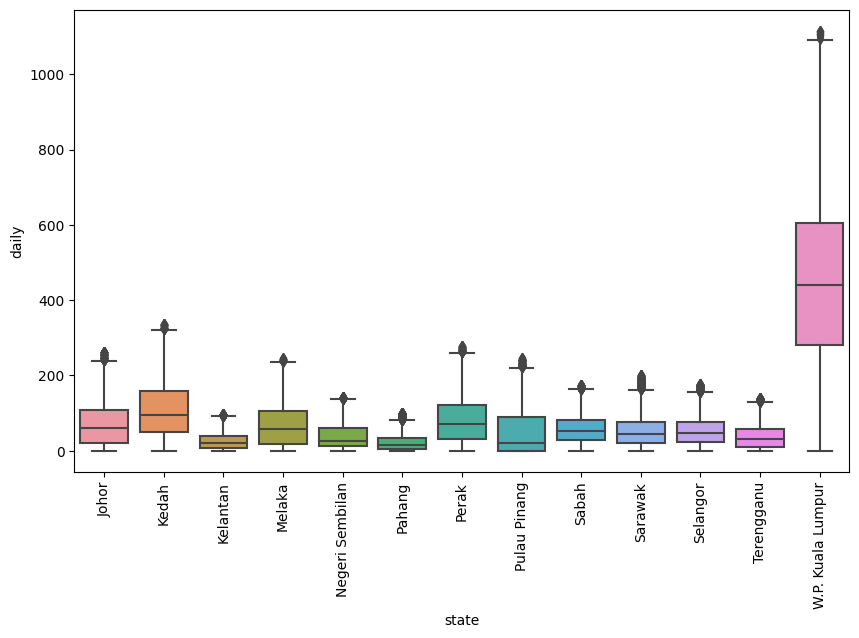

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x=donation_no_outliers['state'], y=donation_no_outliers['daily'])
plt.xticks(rotation=90)
plt.show()

## 3.Data Summary

Then we will provide a data summary for the blood donations dataset. A summary provides information like mean, median, standard deviation, and percentiles for numerical variable and unique categories and frequencies for categorical values.

In [12]:
donation_final = donation_no_outliers
donation_final

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Johor,87,19,20,45,3,87,0,87,0,0,0,86,1,0,36,49,2
1,2006-01-02,Johor,15,4,3,6,2,15,0,15,0,0,0,15,0,0,4,11,0
2,2006-01-03,Johor,8,2,2,4,0,8,0,8,0,0,0,8,0,0,2,5,1
3,2006-01-04,Johor,33,7,11,12,3,33,0,33,0,0,0,32,0,1,25,8,0
4,2006-01-05,Johor,20,3,8,8,1,20,0,20,0,0,0,17,3,0,16,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81193,2023-11-05,W.P. Kuala Lumpur,805,216,206,379,4,123,682,805,0,0,0,733,69,3,109,557,139
81194,2023-11-06,W.P. Kuala Lumpur,469,99,153,193,24,100,369,441,11,16,1,267,196,6,111,319,39
81195,2023-11-07,W.P. Kuala Lumpur,555,147,138,234,36,83,472,537,9,9,0,419,129,7,113,319,123
81196,2023-11-08,W.P. Kuala Lumpur,504,127,146,200,31,105,399,481,13,10,0,450,46,8,77,337,90


In [13]:
donation_final_num = donation_final.drop(['date', 'state'], axis=1)

Here we can obtain mean, median, standard deviation, and percentiles for numerical variable

In [14]:
donation_final_num.describe()

,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
count,81198.000000,81198.000000,81198.000000,81198.000000,81198.000000,81198.000000,81198.000000,81198.000000,81198.000000,81198.000000,81198.000000,81198.000000,81198.000000,81198.000000,81198.000000,81198.000000,81198.000000
mean,87.911143,21.815143,23.984704,36.615668,5.493621,47.528954,40.382189,85.909764,0.968497,0.865822,0.167061,74.603180,10.795488,2.512476,29.727346,46.937597,11.246201
std,136.366638,34.608076,37.335616,57.000609,8.785527,52.917669,118.762767,132.323721,3.408874,3.218466,1.502509,107.228941,36.989572,19.073844,52.029078,74.906237,23.087533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,3.000000,4.000000,6.000000,0.000000,8.000000,0.000000,15.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,2.000000,8.000000,0.000000
50%,47.000000,11.000000,13.000000,20.000000,3.000000,30.000000,0.000000,46.000000,0.000000,0.000000,0.000000,42.000000,2.000000,0.000000,13.000000,23.000000,4.000000
75%,98.000000,24.000000,27.000000,41.000000,7.000000,71.000000,0.000000,97.000000,0.000000,0.000000,0.000000,89.000000,6.000000,1.000000,34.000000,51.000000,12.000000
max,1116.000000,398.000000,408.000000,533.000000,94.000000,482.000000,1094.000000,1116.000000,38.000000,75.000000,137.000000,1067.000000,765.000000,930.000000,1009.000000,762.000000,317.000000


In [15]:
donation_final_num.median()

daily                      47.0
blood_a                    11.0
blood_b                    13.0
blood_o                    20.0
blood_ab                    3.0
location_centre            30.0
location_mobile             0.0
type_wholeblood            46.0
type_apheresis_platelet     0.0
type_apheresis_plasma       0.0
type_other                  0.0
social_civilian            42.0
social_student              2.0
social_policearmy           0.0
donations_new              13.0
donations_regular          23.0
donations_irregular         4.0
dtype: float64

Now moving on to the categorical data 'state'

In [16]:
unique_states = donation_final['state'].unique()
unique_states

array(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan',
       'Pahang', 'Perak', 'Pulau Pinang', 'Sabah', 'Sarawak', 'Selangor',
       'Terengganu', 'W.P. Kuala Lumpur'], dtype=object)

In [17]:
state_counts = donation_final['state'].value_counts()
state_counts

W.P. Kuala Lumpur    6409
Melaka               6385
Negeri Sembilan      6369
Kedah                6340
Perak                6293
Pulau Pinang         6284
Kelantan             6248
Terengganu           6240
Sabah                6200
Selangor             6177
Johor                6165
Pahang               6056
Sarawak              6032
Name: state, dtype: int64

In [18]:
state_summary = donation_final.groupby('state')['daily'].describe()
state_summary

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
Johor,6165.0,71.846715,62.453674,0.0,19.00,61.0,107.0,263.0
Kedah,6340.0,109.872555,75.594487,0.0,49.00,95.0,158.0,336.0
Kelantan,6248.0,25.759603,23.384102,0.0,6.00,21.0,40.0,97.0
Melaka,6385.0,69.297103,57.273201,0.0,18.00,58.0,105.0,245.0
Negeri Sembilan,6369.0,37.564767,34.823324,0.0,11.00,26.0,61.0,143.0
Pahang,6056.0,22.983322,24.868670,0.0,3.00,14.0,34.0,101.0
Perak,6293.0,82.638010,65.830951,0.0,30.00,72.0,122.0,277.0
Pulau Pinang,6284.0,49.744271,62.865957,0.0,0.00,20.0,88.0,245.0
Sabah,6200.0,58.247581,39.603298,0.0,28.00,51.0,82.0,175.0


Here is a summary for date column

In [19]:
date_summary = donation_final['date'].describe()
date_summary

<ipython-input-19-dc583536a45a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  date_summary = donation_final['date'].describe()


count                   81198
unique                   6522
top       2006-01-01 00:00:00
freq                       13
first     2006-01-01 00:00:00
last      2023-11-09 00:00:00
Name: date, dtype: object

In [20]:
earliest_date = donation_final['date'].min()
latest_date = donation_final['date'].max()
earliest_date, latest_date

(Timestamp('2006-01-01 00:00:00'), Timestamp('2023-11-09 00:00:00'))

## 4.Data Visualization

Next we can start visualizing our data to further analyze and understand it. We can achieve this by creating various plots and charts.

In [21]:
donation_final['year'] = donation_final['date'].dt.year
donation_final

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular,year
0,2006-01-01,Johor,87,19,20,45,3,87,0,87,0,0,0,86,1,0,36,49,2,2006
1,2006-01-02,Johor,15,4,3,6,2,15,0,15,0,0,0,15,0,0,4,11,0,2006
2,2006-01-03,Johor,8,2,2,4,0,8,0,8,0,0,0,8,0,0,2,5,1,2006
3,2006-01-04,Johor,33,7,11,12,3,33,0,33,0,0,0,32,0,1,25,8,0,2006
4,2006-01-05,Johor,20,3,8,8,1,20,0,20,0,0,0,17,3,0,16,3,1,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81193,2023-11-05,W.P. Kuala Lumpur,805,216,206,379,4,123,682,805,0,0,0,733,69,3,109,557,139,2023
81194,2023-11-06,W.P. Kuala Lumpur,469,99,153,193,24,100,369,441,11,16,1,267,196,6,111,319,39,2023
81195,2023-11-07,W.P. Kuala Lumpur,555,147,138,234,36,83,472,537,9,9,0,419,129,7,113,319,123,2023
81196,2023-11-08,W.P. Kuala Lumpur,504,127,146,200,31,105,399,481,13,10,0,450,46,8,77,337,90,2023


Here we visualized the trend of blood donations of each states accross 2006-2023. We can observe most states experience significant drop in 2019-2021

In [22]:
import plotly.express as px

donation_final_date = donation_final.groupby(['state', 'year'])['daily'].sum().reset_index()
fig = px.line(donation_final_date, x='year', y='daily', color='state', title='Daily Blood Donations by State Over Year',
              labels={'daily': 'Daily Blood Donations', 'year': 'Year', 'state': 'State'})
fig.update_traces(mode='lines+markers', hovertemplate='<b>%{y} Daily Donation</b> in %{x}')
fig.update_layout(title='Daily Blood Donations by State Over Time',
                  xaxis_title='Year',
                  yaxis_title='Daily Blood Donations')
fig.show()


Here we visualized  the amount of blood donations of each state according to blood types by colour-coding the variables. We notice that the donations are relatively equal in terms of blood types

In [23]:
donation_final_heat = donation_final.drop(['date', 'state'], axis=1)

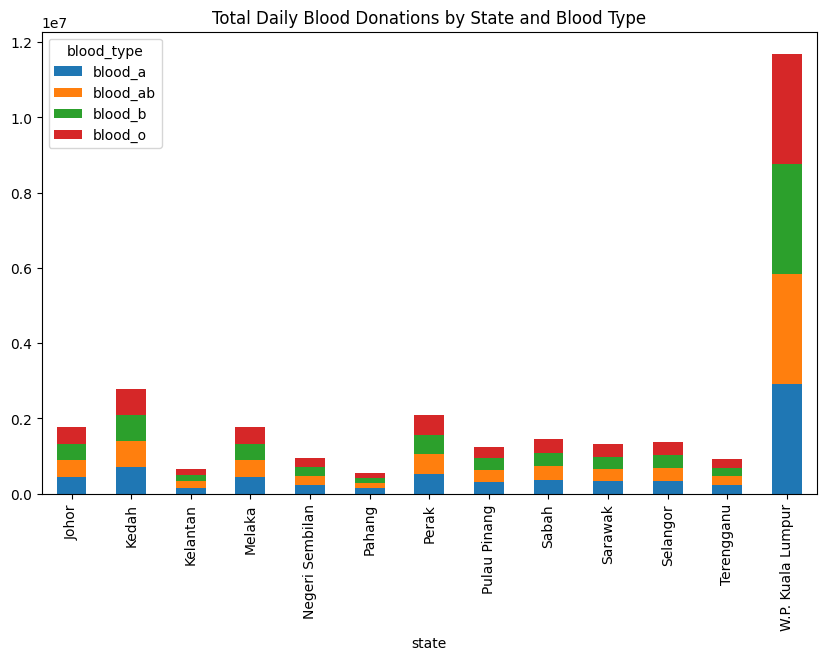

In [24]:
donation_melted = pd.melt(donation_final, id_vars=['state', 'daily'], value_vars=['blood_a', 'blood_b', 'blood_o', 'blood_ab'], var_name='blood_type')
df_pivot = donation_melted.pivot_table(values='daily', index='state', columns='blood_type', aggfunc='sum')
df_pivot.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Total Daily Blood Donations by State and Blood Type')
plt.xticks(rotation=90)
plt.show()

Here we can see the frequency of blood donations per day. We notice that we have a decreasing trend as we move to higher value of donations per day.

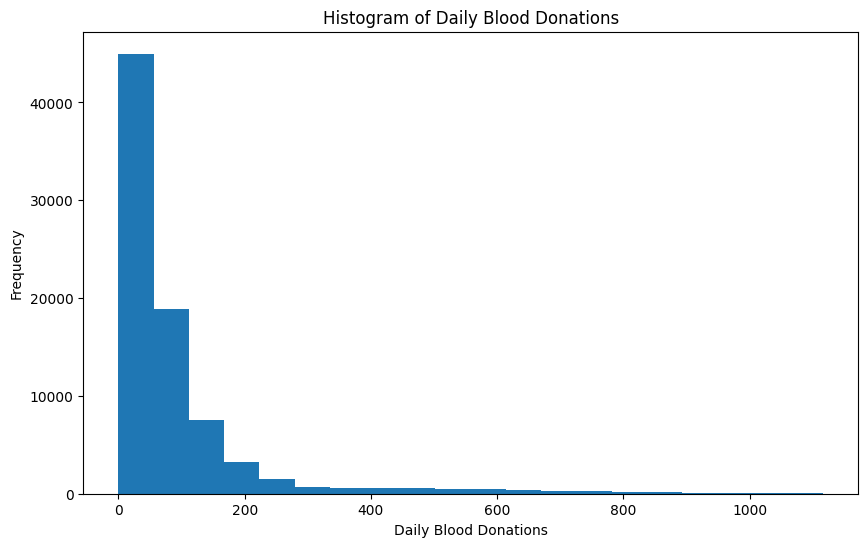

In [25]:
ax = donation_final['daily'].plot(kind='hist',
                             bins=20,
                             title='Histogram of Daily Blood Donations',
                             figsize=(10,6))
ax.set_xlabel('Daily Blood Donations')
plt.show()

Here we used Kernel Density Estimate(KDE) to further study the trend of frequency of quantity of blood donations per day.

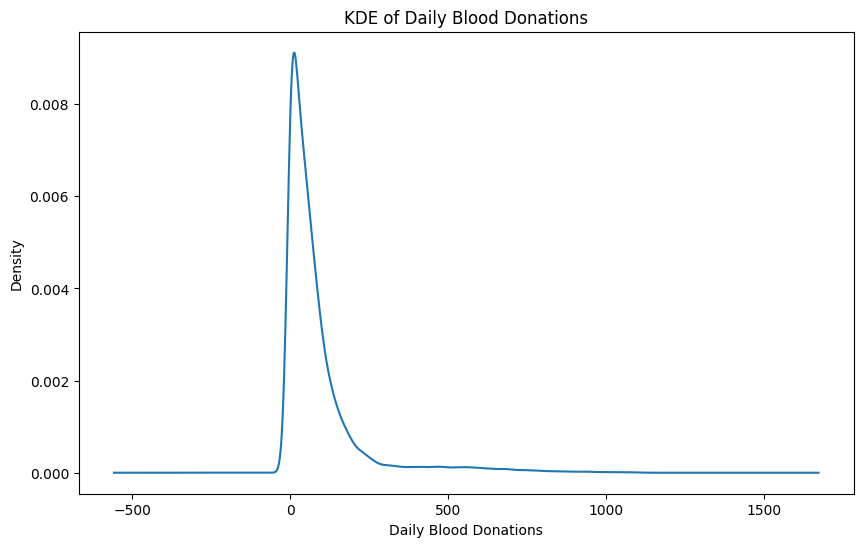

In [26]:
ax = donation_final['daily'].plot(kind='kde',
                             title='KDE of Daily Blood Donations',
                             figsize=(10,6))
ax.set_xlabel('Daily Blood Donations')
plt.show()

Here we used scatter plot to see how the quantity of mobile location donations reacts to the daily quantity of donations.

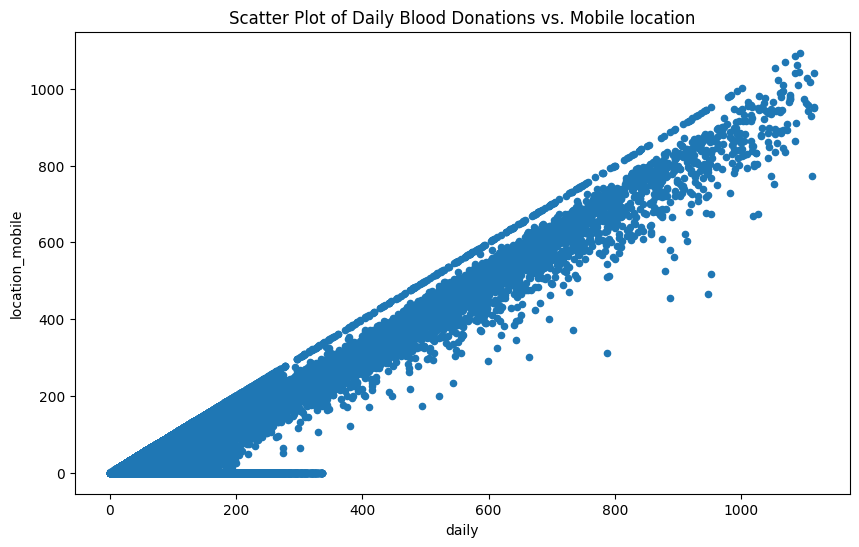

In [27]:
donation_final.plot(kind='scatter',
                    x='daily',
                    y='location_mobile',
                    title='Scatter Plot of Daily Blood Donations vs. Mobile location',
                    figsize=(10,6))
plt.show()

Here we used a barchart to see the quantity of mobile locations donations by state, with a line going across the chart. The line is a calculated mean of donations of Malaysia and we can observe how each states perform against the average number of donations.

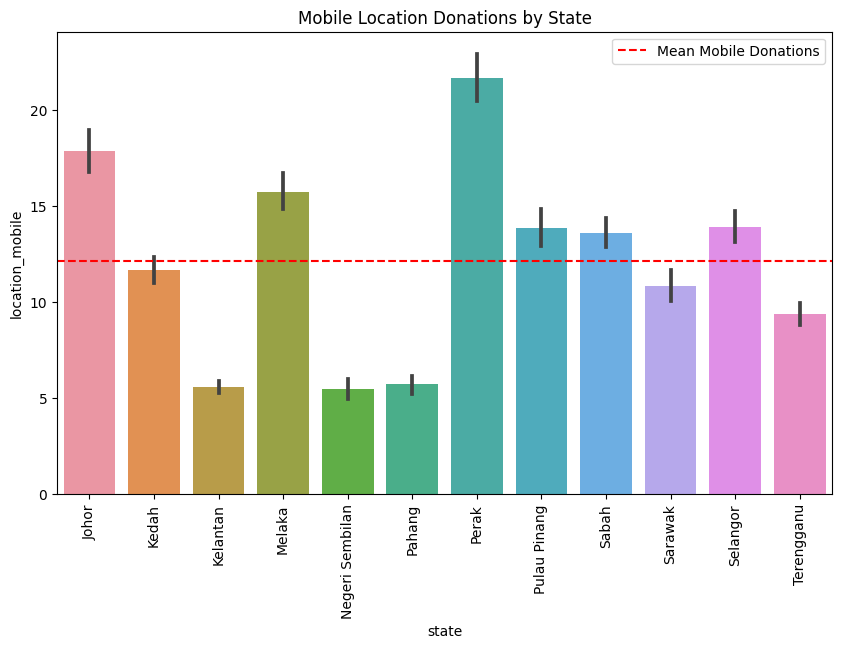

In [28]:
plt.figure(figsize=(10,6))
donation_final_filtered = donation_final[donation_final['state'] != 'W.P. Kuala Lumpur']
sns.barplot(data=donation_final_filtered, x='state', y='location_mobile')
plt.title('Mobile Location Donations by State')
mean_loc = donation_final_filtered['location_mobile'].mean()
plt.axhline(mean_loc, color='red', linestyle='--', label=f'Mean Mobile Donations')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Here we used scatter plot to see how students donations reacts to mobile locations donations. We can see we have a significantly positive relationship.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



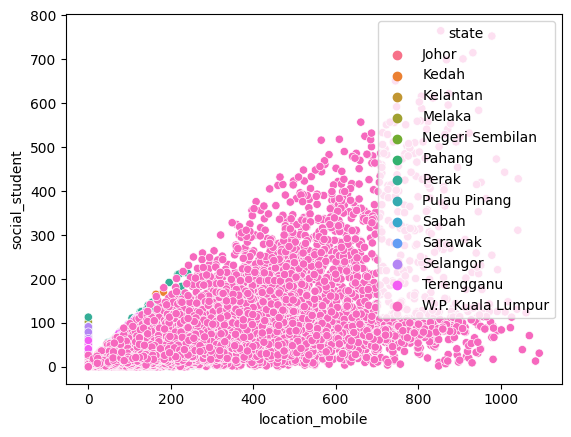

In [29]:

sns.scatterplot( x='location_mobile',
                    y='social_student',
                    hue='state',
                    data=donation_final)
plt.show()

Here we used scatter plot to see how police/army personnel donations reacts to mobile locations donations. We can see we have a significantly positive relationship.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



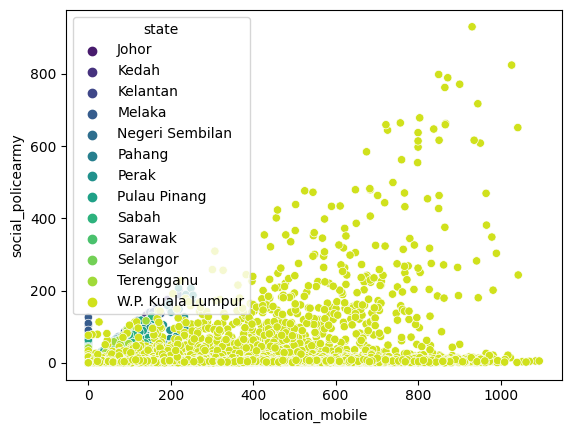

In [30]:
sns.scatterplot( x='location_mobile',
                    y='social_policearmy',
                    hue='state',
                    palette='viridis',
                    data=donation_final)
plt.show()


Here we used seaborn pairplot feature to further understand interesting relationshipd we have in our dataset. Interestingly pairplot allows us to produce multiple charts of relationships. Here we can observe how one variable reacts to the other.

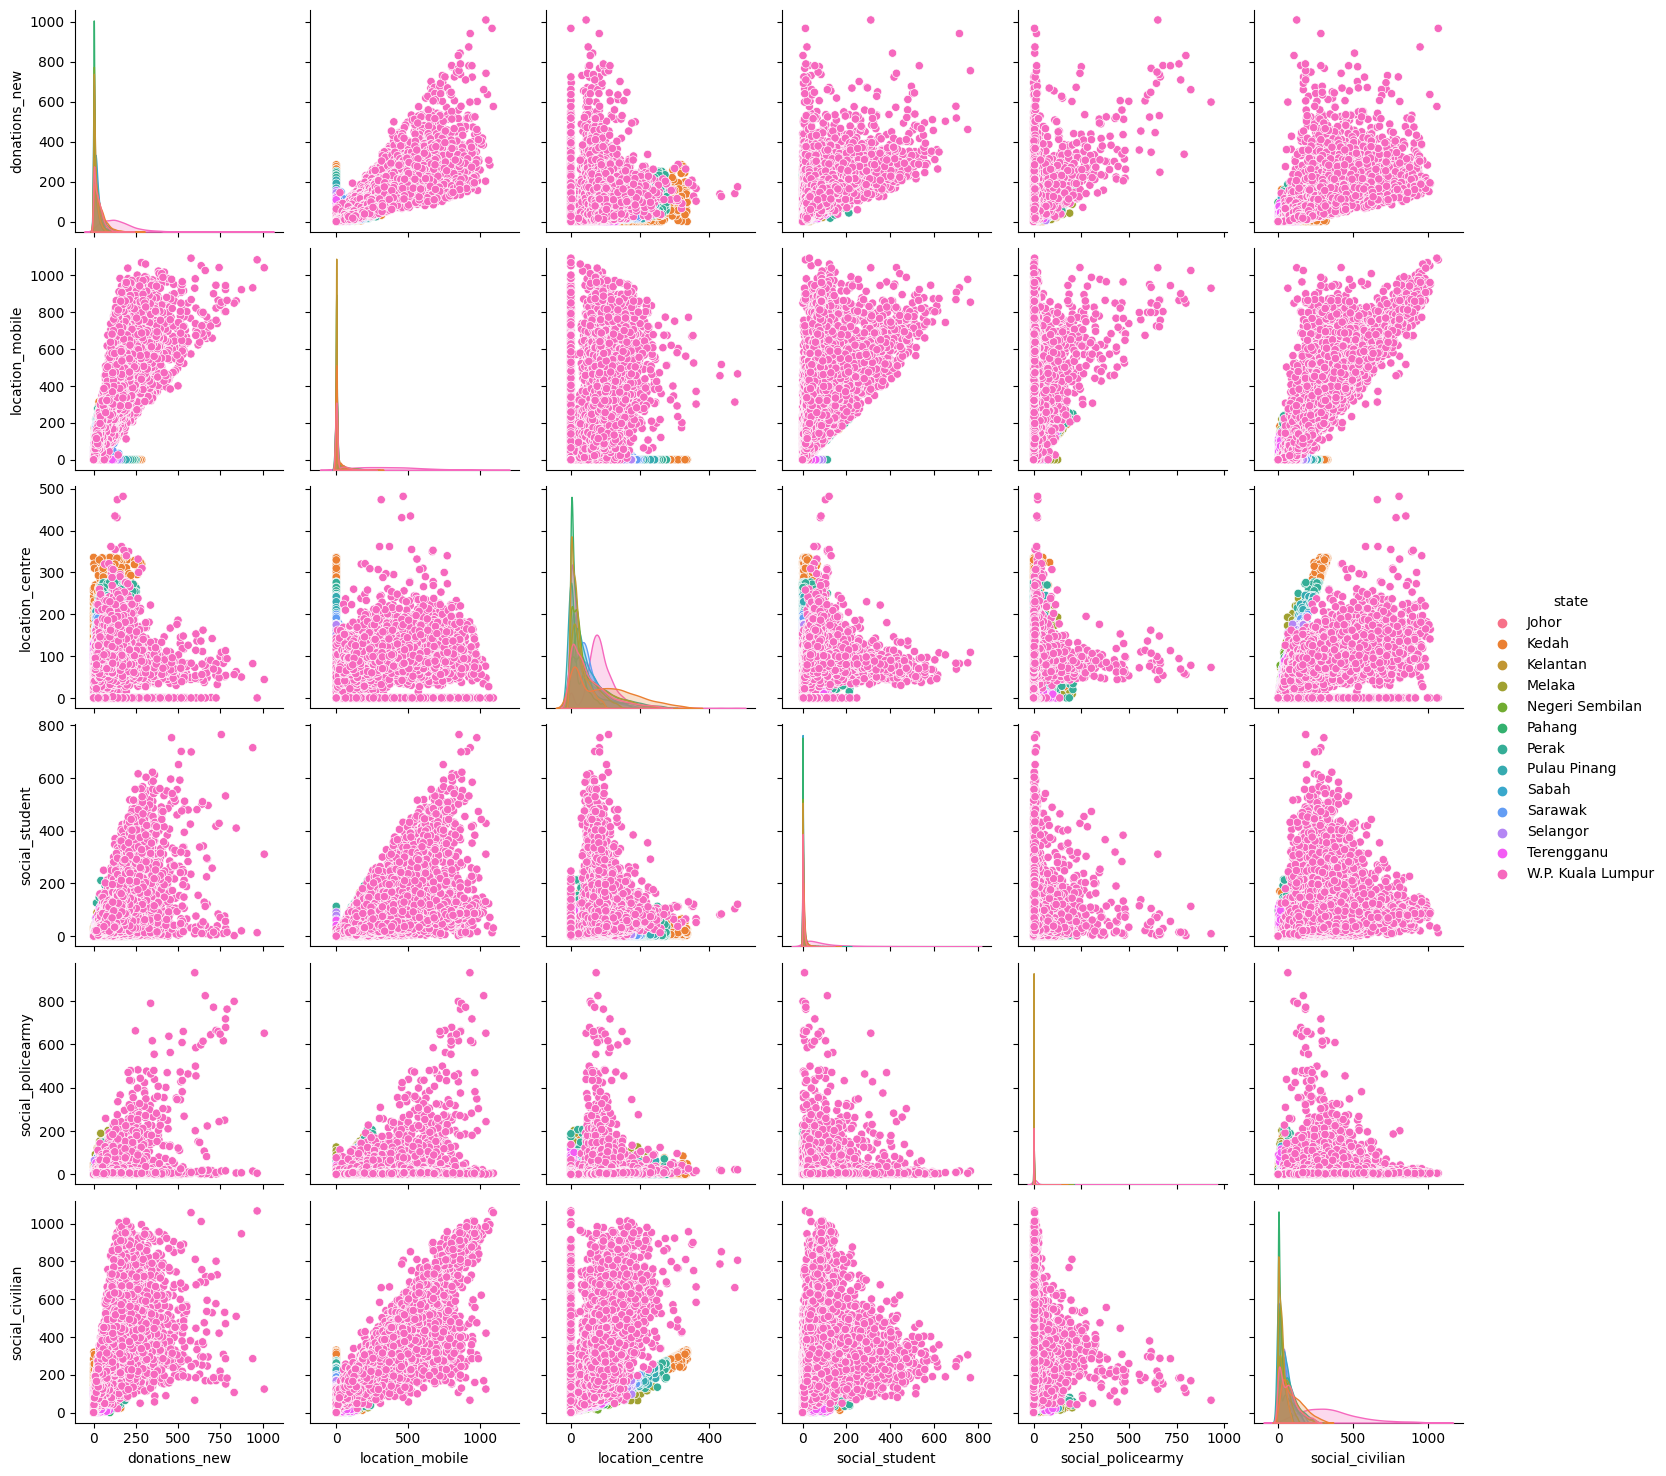

In [31]:
sns.pairplot(donation_final,
             vars=['donations_new', 'location_mobile', 'location_centre', 'social_student', 'social_policearmy', 'social_civilian'] ,
             hue='state')
plt.show()

Here we took a traditional approach of understanding relationship by building a heatmap of our dataset. Here we compare all the numerical variables that we have and we can observe the relationships between them.

In [32]:
donation_final_num.corr()

,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
daily,1.000000,0.991726,0.991577,0.995027,0.944915,0.505220,0.923114,0.999264,0.628169,0.548930,0.154551,0.960270,0.724362,0.346235,0.861072,0.959992,0.851390
blood_a,0.991726,1.000000,0.978006,0.981259,0.930905,0.499133,0.916326,0.991146,0.621119,0.541166,0.151182,0.952651,0.718726,0.340845,0.852605,0.953082,0.844017
blood_b,0.991577,0.978006,1.000000,0.979274,0.934631,0.506880,0.912703,0.990482,0.630224,0.550478,0.155534,0.949822,0.719982,0.353247,0.859481,0.948141,0.843673
blood_o,0.995027,0.981259,0.979274,1.000000,0.928989,0.497318,0.920925,0.994580,0.620008,0.540312,0.152743,0.958373,0.717186,0.335264,0.848660,0.959232,0.852455
blood_ab,0.944915,0.930905,0.934631,0.928989,1.000000,0.494848,0.864486,0.943346,0.602026,0.543202,0.151278,0.897442,0.698945,0.354909,0.847706,0.892963,0.773624
location_centre,0.505220,0.499133,0.506880,0.497318,0.494848,1.000000,0.134533,0.509297,0.212658,0.220213,0.046180,0.565742,0.177175,0.087957,0.456444,0.489044,0.368788
location_mobile,0.923114,0.916326,0.912703,0.920925,0.864486,0.134533,1.000000,0.920452,0.626526,0.532175,0.156883,0.850528,0.752788,0.358365,0.785326,0.884383,0.813267
type_wholeblood,0.999264,0.991146,0.990482,0.994580,0.943346,0.509297,0.920452,1.000000,0.601670,0.520659,0.143655,0.961932,0.718490,0.343018,0.859383,0.959538,0.852321
type_apheresis_platelet,0.628169,0.621119,0.630224,0.620008,0.602026,0.212658,0.626526,0.601670,1.000000,0.773238,0.098948,0.556204,0.563795,0.270822,0.522635,0.613591,0.541736
type_apheresis_plasma,0.548930,0.541166,0.550478,0.540312,0.543202,0.220213,0.532175,0.520659,0.773238,1.000000,0.070450,0.482445,0.498861,0.244889,0.508816,0.520633,0.406446


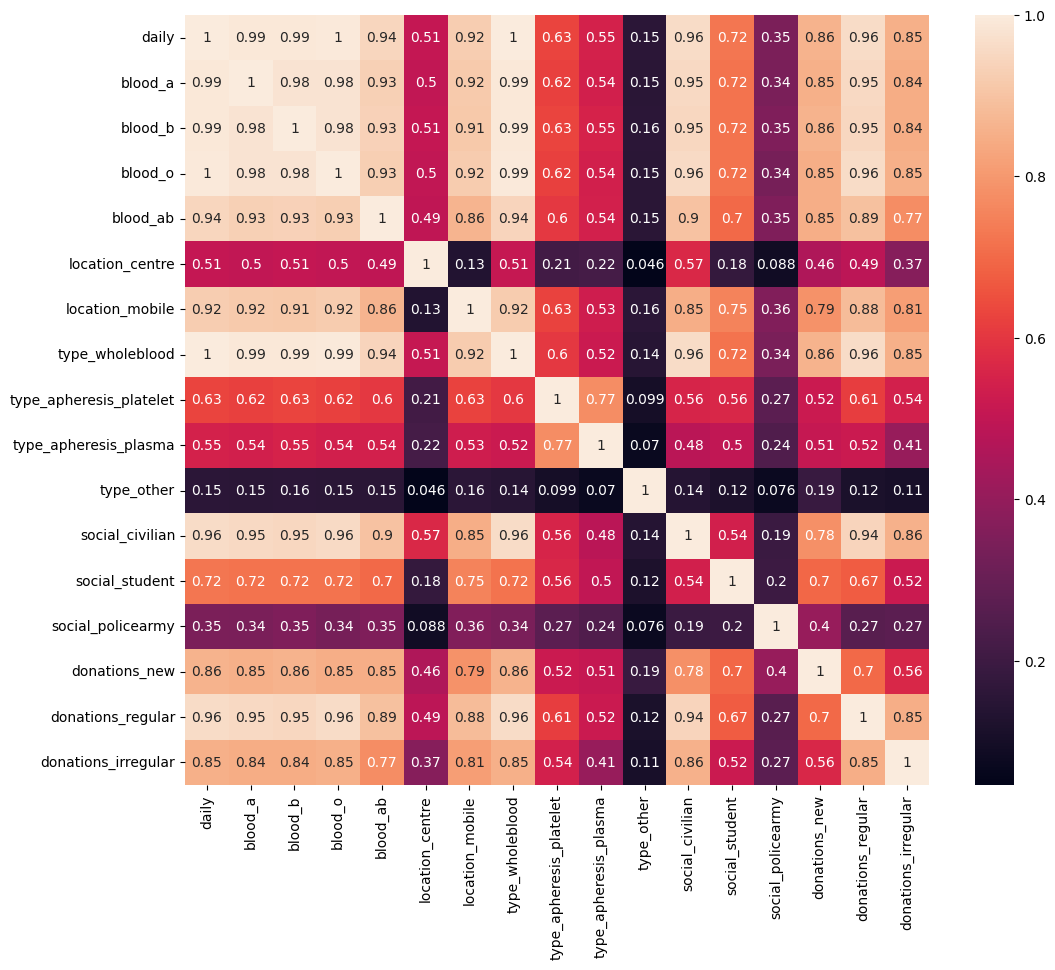

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(donation_final_num.corr(), annot=True)
plt.show()

## 5.Asking and Answering Questions

Here, we will ask 10 questions and provide answers through data analysis.

#### Q1| What is the average donations by students according to the respective states?


In [34]:
average_donations = donation_final.groupby('state')['social_student'].mean()
average_donations

state
Johor                 3.511111
Kedah                 7.059464
Kelantan              3.048335
Melaka                4.369930
Negeri Sembilan       2.999058
Pahang                1.731671
Perak                 7.028444
Pulau Pinang          2.956875
Sabah                 1.824839
Sarawak               2.268733
Selangor              4.415088
Terengganu            4.495673
W.P. Kuala Lumpur    92.135747
Name: social_student, dtype: float64

Here we can see the average donations by students according to their respective states. We notice that W.P. Kuala Lumpur has a significant lead against other states, which can be further analyzed with a barchart below.

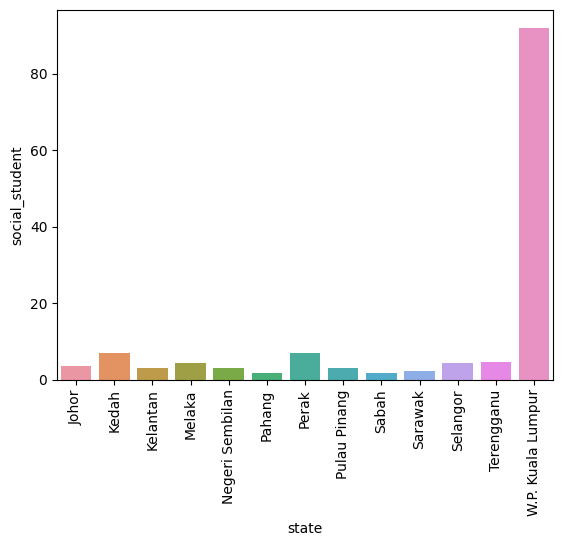

In [35]:
sns.barplot(x='state',
            y='social_student',
            data=donation_final.groupby('state')['social_student'].mean().reset_index())
plt.xticks(rotation=90)
plt.show()

#### Q2| What social group donates the most in W.P. Kuala Lumpur?


In [36]:
wpkl_df = donation_final[donation_final['state'] == 'W.P. Kuala Lumpur']
social_student_donations = wpkl_df['social_student'].sum()
social_civilian_donations = wpkl_df['social_civilian'].sum()
social_policearmy_donations = wpkl_df['social_policearmy'].sum()
print('Social Student Donations: {}'.format(social_student_donations))
print('Social Civilian Donations: {}'.format(social_civilian_donations))
print('Social Police/Army Donations: {}'.format(social_policearmy_donations))

Social Student Donations: 590498
Social Civilian Donations: 2201368
Social Police/Army Donations: 131581


We can see that civilian has a significant lead over other groups with value of 2201368 and second is 590498 and below them is police/army with 131581. We can study this easier with  a barchart created below.

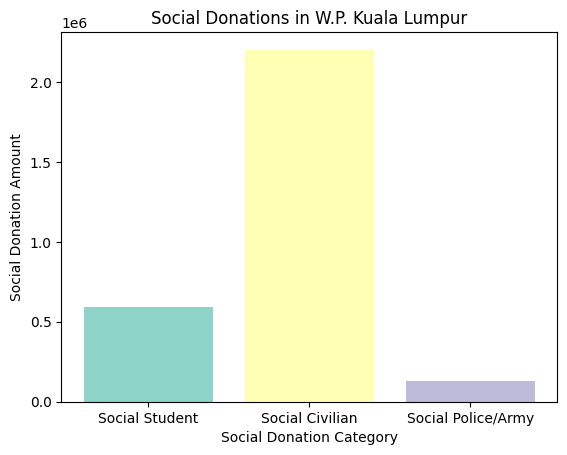

In [37]:
social_donations = [social_student_donations, social_civilian_donations, social_policearmy_donations]
social_donation_categories = ['Social Student', 'Social Civilian', 'Social Police/Army']
colors_2 = sns.color_palette("Set3", n_colors=len(social_donation_categories))

plt.bar(social_donation_categories, social_donations , color=colors_2)
plt.title('Social Donations in W.P. Kuala Lumpur')
plt.xlabel('Social Donation Category')
plt.ylabel('Social Donation Amount')
plt.show()

#### Q3| What state has the highest donations from Police/Army personnel?


In [38]:
social_policearmy_donation_count_by_state = donation_final.groupby('state')['social_policearmy'].count()

print(social_policearmy_donation_count_by_state)

state
Johor                6165
Kedah                6340
Kelantan             6248
Melaka               6385
Negeri Sembilan      6369
Pahang               6056
Perak                6293
Pulau Pinang         6284
Sabah                6200
Sarawak              6032
Selangor             6177
Terengganu           6240
W.P. Kuala Lumpur    6409
Name: social_policearmy, dtype: int64


Here we can see the value of donations from police/army personnel according to states. We can see that W.P. Kuala Lumpur has the lead by a tiny margin with 6409 and other states being in the 6000s with Sarawak being the least with 6032. This can be converted to a barchart for a better analysis.

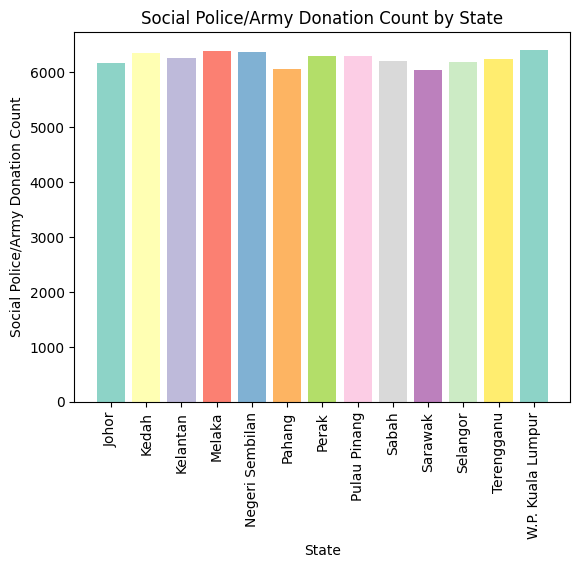

In [39]:
state_names = social_policearmy_donation_count_by_state.index.tolist()
social_policearmy_donation_counts = social_policearmy_donation_count_by_state.values.tolist()
colors = sns.color_palette("Set3", n_colors=len(state_names))

plt.bar(state_names, social_policearmy_donation_counts ,color=colors)
plt.title('Social Police/Army Donation Count by State')
plt.xlabel('State')
plt.ylabel('Social Police/Army Donation Count')

plt.xticks(rotation=90)

plt.show()

#### Q4| What is the average daily donations of states?


In [40]:
average_daily_donation = donation_final.groupby('state')['daily'].mean()
average_daily_donation = average_daily_donation.reset_index()
average_daily_donation


,state,daily
0,Johor,71.846715
1,Kedah,109.872555
2,Kelantan,25.759603
3,Melaka,69.297103
4,Negeri Sembilan,37.564767
5,Pahang,22.983322
6,Perak,82.638010
7,Pulau Pinang,49.744271
8,Sabah,58.247581
9,Sarawak,54.307029


After calculations we can see that the average daily donations of W.P. Kuala Lumpur is the highest with 456 daily average donations. Coming in second and third is Kedah with 109 and Perak with 82 respectively. We created a barchart below to further understand the analysis.

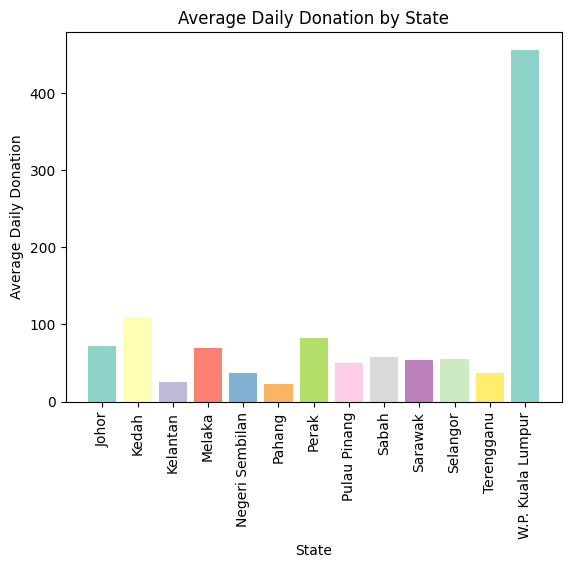

In [41]:
colors_1 = sns.color_palette("Set3", n_colors=len(average_daily_donation))

plt.bar(average_daily_donation['state'], average_daily_donation['daily'] , color=colors_1)
plt.xlabel('State')
plt.ylabel('Average Daily Donation')
plt.title('Average Daily Donation by State')
plt.xticks(rotation=90)
plt.show()

#### Q5| What is the trend of blood donations in Malaysia from 2006 to 2022?


We can visualize to clearly see the trend of blood donations in Malaysia from the year 2006 to 2022.

In [42]:
malaysia_df = donation[donation['state'] == 'Malaysia']
malaysia_df['year'] = pd.to_datetime(malaysia_df['date']).dt.year
yearly_donations = malaysia_df.groupby('year')['daily'].sum().reset_index()
fig = px.line(yearly_donations, x='year', y='daily', markers=True, title='Trend of Blood Donations in Malaysia (2006-2022)')
fig.update_traces(marker=dict(color='blue'))
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Total Donations')
fig.show()

<ipython-input-42-36cc7079543f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Q6| How many donations in between the year 2018-2019 compared to the year 2020-2021?


After comparison and after we have created a barchart we can clearly observe how we have more donations in 2017-2018 compared to 2020-2021.

<ipython-input-43-835676a3f195>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



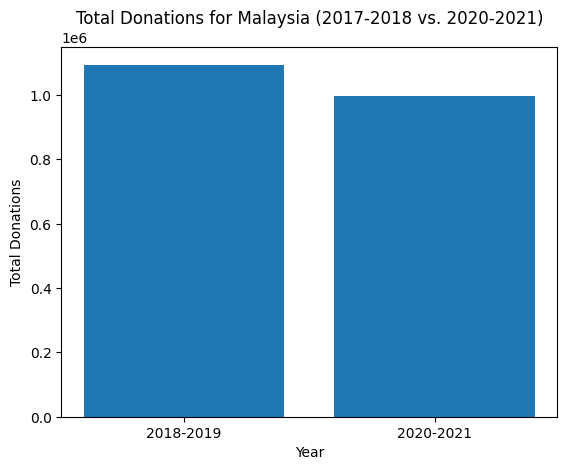

In [43]:
malaysia_df = donation[donation['state'] == 'Malaysia']

malaysia_df['year'] = pd.to_datetime(malaysia_df['date']).dt.year

yearly_donations = malaysia_df.groupby('year')['daily'].sum()

plt.bar(['2018-2019', '2020-2021'], [yearly_donations.get(2017, 0) + yearly_donations.get(2018, 0), yearly_donations.get(2020, 0) + yearly_donations.get(2021, 0)])
plt.xlabel('Year')
plt.ylabel('Total Donations')
plt.title('Total Donations for Malaysia (2017-2018 vs. 2020-2021)')

plt.show()

#### Q7| In the year 2022, which month has the most donations from students?


In [44]:
data = {
    'date': pd.date_range(start='2022-01-01', end='2022-12-31', freq='D'),
    'social_student': range(1, len(pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')) + 1)
}

malaysia_df = pd.DataFrame(data)

df_2022 = malaysia_df[(malaysia_df['date'].dt.year == 2022)]
df_2022['month'] = df_2022['date'].dt.strftime('%b')

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sum_2022 = df_2022.groupby('month')['social_student'].sum()
monthly_sum_2022 = monthly_sum_2022.reindex(month_order)

print(monthly_sum_2022)

month
Jan      496
Feb     1274
Mar     2325
Apr     3165
May     4216
Jun     4995
Jul     6107
Aug     7068
Sep     7755
Oct     8959
Nov     9585
Dec    10850
Name: social_student, dtype: int64


We can notice that we have December as our highest month in terms of donations with 10850. We can visualize this to analyze the trend better.

In [45]:
fig = px.line(monthly_sum_2022.reset_index(), x='month', y='social_student', title='Monthly donations from students in 2022')
fig.update_xaxes(title='Month')
fig.update_yaxes(title='Donations from students')
fig.show()


#### Q8| What year has the highest amount of wholeblood donations?


In [46]:
type_donation = donation[donation['state'] == 'Malaysia']
type_donation['year'] = pd.to_datetime(type_donation['date']).dt.year

yearly_type_counts = type_donation.groupby(['year', 'type_wholeblood']).size().unstack(fill_value=0)

year_with_most_wholeblood = yearly_type_counts.sum(axis=1).idxmax()
most_wholeblood_count = yearly_type_counts.loc[year_with_most_wholeblood].sum()

print(f"The year with the most 'type_wholeblood' values is {year_with_most_wholeblood} with {most_wholeblood_count} values.")

The year with the most 'type_wholeblood' values is 2008 with 366 values.


<ipython-input-46-8e9b2444f2d4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Q9| What is the trend of types of blood donations in Malaysia from 2006 to 2022?


After visualizations of the trend. We can notice  that there is a significant drop between 2019-2021.

In [47]:
all_type_donation = donation[donation['state'] == 'Malaysia']
all_type_donation['year'] = pd.to_datetime(all_type_donation['date']).dt.year

yearly_sums = all_type_donation.groupby('year').agg({ 'type_apheresis_platelet': 'sum', 'type_apheresis_plasma': 'sum', 'type_other': 'sum'}).reset_index()

fig = px.line(yearly_sums, x='year', y=[ 'type_apheresis_platelet', 'type_apheresis_plasma', 'type_other'],
              title='Trend of Types of Blood Donations in Malaysia (2006-2022)')
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Count')

fig.show()

<ipython-input-47-08ff63f23f7f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Q10| What is the relationship between apherisis platelet donations and group of donors?


After calculations we can conclude that students have the highest affect on apherisis platlet donations with a pearson score of 0.599 and police/army with 0.310 and civilian with 0.543

In [48]:
import scipy.stats

student_platelet = scipy.stats.pearsonr(donation['type_apheresis_platelet'], donation['social_student'])[0]
student_platelet

0.5989879052335372

In [49]:
policearmy_platelet = scipy.stats.pearsonr(donation['type_apheresis_platelet'], donation['social_policearmy'])[0]
policearmy_platelet

0.3101338719853333

In [50]:
civilian_platelet = scipy.stats.pearsonr(donation['type_apheresis_platelet'], donation['social_civilian'])[0]
civilian_platelet

0.543036209560747

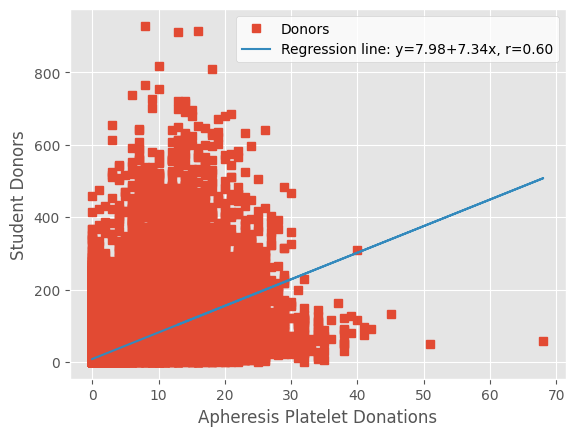

In [51]:
x, y = donation['type_apheresis_platelet'], donation['social_student']

slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Donors')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Apheresis Platelet Donations')
ax.set_ylabel('Student Donors')
ax.legend(facecolor='white')
plt.show()

<hr>

## 6.Inferences

To conclude our analysis on Malaysian blood donations so far, we can say that: :   

- Kuala Lumpur has the highest donations from students as compared to other states. Kuala Lumpur leads by a very significant amount and this may be to higher accessibility to blood donation centres and the high density of educational institute in the state.
- Civilians remain the highest group to donate blood in Kuala Lumpur which is expected as civilian represents a much wider demographic which can include working people, retired people. tourists and such.
- The state that has the highest blood donors from police/army personnel is Kuala Lumpur. Interestingly, other states have very similar amounts of donors from the same group. We may conclude this is a result of government campaigns for civil servants.
- The 3 highest state with average blood donations per day are Kuala Lumpur, Perak and Kedah. This concludes that they have better accessibility or blood donation campaigns. Surprisingly, Negeri Sembilan and Selangor sits quite low in the average number and we suspect this may due to people working in Kuala Lumpur donating their blood there.
- Malaysia as a whole is at a much better position now, than in 2006, with almost 300k increase per year. We also notice how the Movement Control Order affected the daily blood donation count especially in between 2019-2021 where we observe a significant drop of almost 50k.
- This is more evident if we zoom in to the year 2018-2019 and 2020-2021 and compare them both.
- We notice the highest donations from students come from the month November and December with 9k and 10k respectively. This may be caused by the school break and holidays which allow them to go and donate their blood. January sits on a really low turnout and we conclude this may be due to the recent MCO which just ended at that moment and there might still be fear living amongst the public and some activities were still tied to safety regulations.
- We learnt that 2008 has the highest wholeblood donations.
- When we look at each types of blood donations and their trend between 2006-2022, we notice that apherisis platelet has a relatively consistent trend but apherisis plasma and others are slowly decreasing going into 2022.
- We notice that student donors contribute the most to apherisis platelet donations with a pearson score of 0.598 which is relatively high. We conclude this may be due to the fact that apherisis platelet is recommended for teenagers.

<hr>

## 7.References

This project focuses heavily on EDA. We learnt the advantages of EDA and how it can help us find hidden informations few of which are relationships between variables and patterns. We believe this will help us significantly in future analysis, decision making and reporting.

Some ideas for future work are:
1. Between weekends and weekdays, which has the highest donor turnouts in KL? We believe this could help us understand if most of the donors in KL come from working class community.
2. Prediction of future mobile locations donations. We believe mobile locations attract more donors than location centers.

__Reference__:    <br />
[A Complete Guide to Data Visualization in Python With Libraries, Chart, Graphs & More](https://www.simplilearn.com/tutorials/python-tutorial/data-visualization-in-python)